## A comparison between the capture on the 11. of may 2025, between the H1 and H2 sattelite

### Imports

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

In [2]:
importlib.reload(f)
importlib.reload(ac)
importlib.reload(atm_c)

<module 'atmosperic_correction' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/atmosperic_correction.py'>

### Data upploading 

In [3]:
##H1

image_path_t_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc") 

trondheim_path_25_0511 = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1a.nc")
trondheim_path_25_0511_b = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1b.nc")
trondheim_path_25_0511_c = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1c.nc")########## OBSOBSOSOSSB IKKE TRONDHIEM
trondheim_path_25_0511_d = os.path.join(dir_path, "image63N9E_2025-05-11T10-04-27Z-l1d.nc")

satobj_h1_25_0511 = Hypso1( path = trondheim_path_25_0511, verbose = True )

l1a_cube_25_0511 = satobj_h1_25_0511.l1a_cube
l1b_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_b, verbose = True )
l1c_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_c, verbose = True )
l1d_cube_25_0511 = Hypso1( path = trondheim_path_25_0511_d, verbose = True )

l1b_cube_25_0511 = l1b_cube_25_0511.l1c_cube
l1c_cube_25_0511 = l1c_cube_25_0511.l1b_cube
l1d_cube_25_0511 = l1d_cube_25_0511.l1d_cube

satobj_h1_25_0511.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image63N9E_2025-05-11T10-04-27Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 431
[INFO] ADCS time range: 1746957180.000000 to 1746958140.000000
[INFO] Frame time range: 1746957867.923740 to 1746957917.673740
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [4]:
## H2
i_250511_2 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1a.nc")
i_250511_2_b = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1b.nc")
i_250511_2_c = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc")
i_250511_2_d = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1d.nc")

satobj_h1_250511_2 = Hypso2( path = i_250511_2, verbose = True )

l1a_cube_250511_2 = satobj_h1_250511_2.l1a_cube
l1b_cube_250511_2 = Hypso2( path = i_250511_2_b, verbose = True )
l1c_cube_250511_2 = Hypso2( path = i_250511_2_c, verbose = True )
l1d_cube_250511_2 = Hypso2( path = i_250511_2_d, verbose = True )

l1c_cube_250511_2 = l1c_cube_250511_2.l1c_cube
l1b_cube_250511_2 = l1b_cube_250511_2.l1b_cube
l1d_cube_250511_2 = l1d_cube_250511_2.l1d_cube

satobj_h1_250511_2.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-05-11T12-00-37Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1746964170.000000 to 1746965100.000000
[INFO] Frame time range: 1746964837.479518 to 1746964912.104518
[INFO] 299 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [5]:
path_cla_atm_250511 = os.path.join(dir_path, "image64N9E_2025-05-11T12-00-37Z-l1c.nc.polymer.nc")######
cla_atm_250511 = xr.open_dataset(path_cla_atm_250511)

latitude_250511 = cla_atm_250511['latitude']
longitude_250511 = cla_atm_250511['longitude']

In [6]:
rho_vars = [var for var in cla_atm_250511.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

## ATMC RRS

### H1 analyse m atmc

In [7]:
wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
target_lon_2 = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat_1 = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
target_lon_1 = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 

#### atm corrected data cube

In [8]:
cube_0511__h1 = np.array(l1d_cube_25_0511[:,:, 9:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_25_0511, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0511__h1.reshape(-1,109), solar=np.ones(109), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0511_h1 = (cube_0511__h1 - S) /T
cube_norm_0511_h1[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.007677513297904346
0.002154747147845517
0.0014970680661600475
0.0012710268858370187
0.0011681540432022797
0.001114601762058431
0.001084747517496288
0.001067094682715943
0.0010558224766535318
0.0010482716283571776


#### RRS different areas

In [9]:
latitudes_0511_h1 = satobj_h1_25_0511.latitudes
longitudes_0511_h1 = satobj_h1_25_0511.longitudes

cx_h1 = 72
cy_h1 = -19

In [10]:
latitudes_0511_h1 = satobj_h1_25_0511.latitudes
longitudes_0511_h1 = satobj_h1_25_0511.longitudes

print(latitudes_0511_h1[1][1])

piksel_row_A1_0511_h1, piksel_col_A1_0511_h1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0511_h1, longitudes_0511_h1) #####________
print(piksel_row_A1_0511_h1, piksel_col_A1_0511_h1) 

for i in range(4):
    piksel_col_A1_0511_h1[i] = piksel_col_A1_0511_h1[i] + cx_h1
    piksel_row_A1_0511_h1[i] = piksel_row_A1_0511_h1[i] + cy_h1

rss_A1_0511_h1 = f.hyps1_rss_matrix(cube_norm_0511_h1, piksel_row_A1_0511_h1, piksel_col_A1_0511_h1, satobj_h1_25_0511)    #####________
print(rss_A1_0511_h1.shape) 
median_A1_0511_h1_atmc = np.median(rss_A1_0511_h1, axis = 0)



median_A1_0511_h1_atmc.shape
normaized_spectrum_median_A1_0511_h1 = f.min_max_nomralization(median_A1_0511_h1_atmc)
l2_norm_A1_0511_h1 = np.linalg.norm(median_A1_0511_h1_atmc)  
l2_normalized_spectrum_A1_0511_h1 = median_A1_0511_h1_atmc / l2_norm_A1_0511_h1  



64.69524026335026
[np.int64(226), np.int64(221), np.int64(241), np.int64(238)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  3
(3, 109)


In [11]:
piksel_row_A2_0511_h1, piksel_col_A2_0511_h1 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0511_h1, longitudes_0511_h1) #####________
print(piksel_row_A2_0511_h1, piksel_col_A2_0511_h1) 

for i in range(4):
    piksel_col_A2_0511_h1[i] = piksel_col_A2_0511_h1[i] + cx_h1
    piksel_row_A2_0511_h1[i] = piksel_row_A2_0511_h1[i] + cy_h1

rss_A2_0511_h1 = f.hyps1_rss_matrix(cube_norm_0511_h1, piksel_row_A2_0511_h1, piksel_col_A2_0511_h1, satobj_h1_25_0511)    #####________
print(rss_A2_0511_h1.shape) 

median_A2_0511_h1_atmc = np.median(rss_A2_0511_h1, axis = 0)
median_A2_0511_h1_atmc.shape
normaized_spectrum_median_A2_0511_h1 = f.min_max_nomralization(median_A2_0511_h1_atmc)
l2_norm_A2_0511_h1 = np.linalg.norm(median_A2_0511_h1_atmc)  
l2_normalized_spectrum_A2_0511_h1 = median_A2_0511_h1_atmc / l2_norm_A2_0511_h1  

[np.int64(209), np.int64(217), np.int64(235), np.int64(245)] [np.int64(178), np.int64(223), np.int64(0), np.int64(0)]
Pixel number:  1498
(1498, 109)


In [12]:
piksel_row_A3_0511_h1, piksel_col_A3_0511_h1 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0511_h1, longitudes_0511_h1) #####________
print(piksel_row_A3_0511_h1, piksel_col_A3_0511_h1) 

for i in range(4):
    piksel_col_A3_0511_h1[i] = piksel_col_A3_0511_h1[i] + cx_h1
    piksel_row_A3_0511_h1[i] = piksel_row_A3_0511_h1[i] + cy_h1

rss_A3_0511_h1 = f.hyps1_rss_matrix(cube_norm_0511_h1, piksel_row_A3_0511_h1, piksel_col_A3_0511_h1, satobj_h1_25_0511)    #####________
print(rss_A3_0511_h1.shape) 

median_A3_0511_h1_atmc = np.median(rss_A3_0511_h1, axis = 0)
median_A3_0511_h1_atmc.shape
normaized_spectrum_median_A3_0511_h1 = f.min_max_nomralization(median_A3_0511_h1_atmc)
l2_norm_A3_0511_h1 = np.linalg.norm(median_A3_0511_h1_atmc)  
l2_normalized_spectrum_A3_0511_h1 = median_A3_0511_h1_atmc / l2_norm_A3_0511_h1  

[np.int64(185), np.int64(192), np.int64(215), np.int64(216)] [np.int64(440), np.int64(490), np.int64(377), np.int64(440)]
Pixel number:  18
(18, 109)


In [13]:
piksel_row_A5_0511_h1, piksel_col_A5_0511_h1 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0511_h1, longitudes_0511_h1) #####________
print(piksel_row_A5_0511_h1, piksel_col_A5_0511_h1) 

for i in range(4):
    piksel_col_A5_0511_h1[i] = piksel_col_A5_0511_h1[i] + cx_h1
    piksel_row_A5_0511_h1[i] = piksel_row_A5_0511_h1[i] + cy_h1

rss_A5_0511_h1 = f.hyps1_rss_matrix(cube_norm_0511_h1, piksel_row_A5_0511_h1, piksel_col_A5_0511_h1, satobj_h1_25_0511)    #####________
print(rss_A5_0511_h1.shape) 

median_A5_0511_h1_atmc = np.median(rss_A5_0511_h1, axis = 0)
median_A5_0511_h1_atmc.shape
normaized_spectrum_median_A5_0511_h1 = f.min_max_nomralization(median_A5_0511_h1_atmc)
l2_norm_A5_0511_h1 = np.linalg.norm(median_A5_0511_h1_atmc)  
l2_normalized_spectrum_A5_0511_h1 = median_A5_0511_h1_atmc / l2_norm_A5_0511_h1  

[np.int64(121), np.int64(147), np.int64(170), np.int64(187)] [np.int64(543), np.int64(950), np.int64(437), np.int64(844)]
Pixel number:  7248
(7248, 109)


In [14]:
piksel_row_A6_0511_h1, piksel_col_A6_0511_h1 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0511_h1, longitudes_0511_h1) #####________
print(piksel_row_A6_0511_h1, piksel_col_A6_0511_h1) 

for i in range(4):
    piksel_col_A6_0511_h1[i] = piksel_col_A6_0511_h1[i] #+ cx_h1
    piksel_row_A6_0511_h1[i] = piksel_row_A6_0511_h1[i] #+ cy_h1

rss_A6_0511_h1 = f.hyps1_rss_matrix(cube_norm_0511_h1, piksel_row_A6_0511_h1, piksel_col_A6_0511_h1, satobj_h1_25_0511)    #####________
print(rss_A6_0511_h1.shape) 

median_A6_0511_h1_atmc = np.median(rss_A6_0511_h1, axis = 0)
median_A6_0511_h1_atmc.shape
normaized_spectrum_median_A6_0511_h1 = f.min_max_nomralization(median_A6_0511_h1_atmc)
l2_norm_A6_0511_h1 = np.linalg.norm(median_A6_0511_h1_atmc)  
l2_normalized_spectrum_A6_0511_h1 = median_A6_0511_h1_atmc / l2_norm_A6_0511_h1  

[np.int64(58), np.int64(74), np.int64(111), np.int64(133)] [np.int64(458), np.int64(1091), np.int64(475), np.int64(1091)]
Pixel number:  23108
(23108, 109)


### H2 analyse m atmc

In [15]:
## fiske for alle områdene og sjekke opp omrpdene i plot kalibreringa til H2

latitude_250511_2 = np.array(cla_atm_250511['latitude'])
longitude_250511_2 = np.array(cla_atm_250511['longitude'])

rss_atmc_250511_H2 = atm_c.rss_atm_corrected(rho_vars_sorted, cla_atm_250511) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_250511_H2_A1, start_end_row_col_250511_H2_A1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_H2_A1, area_in_piksel_cols_250511_H2_A1 = atm_c.piksles_in_slected_area(start_end_row_piksel_250511_H2_A1, start_end_row_col_250511_H2_A1, latitude_250511_2, longitude_250511_2)
rss_for_250511_H2_A1 = atm_c.rss_given_pixels(area_in_piksel_rows_250511_H2_A1, area_in_piksel_cols_250511_H2_A1, rss_atmc_250511_H2) #***********'

median_250511_H2_A1 = np.median(rss_for_250511_H2_A1, axis=0) #**************

normaized_spectrum_median_250511_H2_A1 = f.min_max_nomralization(median_250511_H2_A1) #**********

l2_norm_median_250511_H2_A1 = np.linalg.norm(median_250511_H2_A1)  #l2 norm ****************
l2_normalized_median_spectrum_250511_H2_A1 = median_250511_H2_A1 / l2_norm_median_250511_H2_A1  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250511_H2_A1.shape) #*********
print("Median RSS for area:", median_250511_H2_A1.shape)            #*********
print(median_250511_H2_A1)                                          #*********    

number of pixels in area: (451, 109)
Median RSS for area: (109,)
[-1.51061709e-03 -3.67649831e-03 -2.00276240e-03  4.11290239e-05
 -3.51379538e-04 -1.87228282e-03  2.54307431e-03  1.71533960e-03
  4.82363999e-03  2.93951761e-03  5.71786938e-03  3.30243073e-03
  4.83630784e-03  5.08383615e-03  4.82664630e-03  6.11417368e-03
  5.23192855e-03  5.47124213e-03  6.53491495e-03  6.32358389e-03
  6.59128139e-03  8.87025613e-03  7.40202144e-03  7.27240089e-03
  7.28137465e-03  6.16149558e-03  6.82633137e-03  7.89794046e-03
  8.37431382e-03  6.38538878e-03  7.97208399e-03  1.04298275e-02
  7.52105564e-03  7.66872754e-03  8.24048463e-03  8.31238367e-03
  7.07876356e-03  7.99222384e-03  7.50945648e-03  7.05645420e-03
  7.11740972e-03  7.33227003e-03  6.92932494e-03  6.99329423e-03
  6.13608770e-03  6.40313374e-03  6.18887972e-03  5.98992920e-03
  6.62503904e-03  7.05600157e-03  5.10420790e-03  5.12824720e-03
  5.17784851e-03  5.01068216e-03  5.06497687e-03  4.92464006e-03
  4.70482046e-03  4.68634

In [16]:
#plt.imshow(rss_atmc_250511_H2)
#plt.imshow(l1d_cube_250511_2[:,:, 100], origin='upper')
#plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

In [17]:
start_end_row_piksel_250511_H2_A2, start_end_row_col_250511_H2_A2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_H2_A2, area_in_piksel_cols_250511_H2_A2 = atm_c.piksles_in_slected_area(start_end_row_piksel_250511_H2_A2, start_end_row_col_250511_H2_A2, latitude_250511_2, longitude_250511_2)
rss_for_250511_H2_A2 = atm_c.rss_given_pixels(area_in_piksel_rows_250511_H2_A2, area_in_piksel_cols_250511_H2_A2, rss_atmc_250511_H2) #***********'

median_250511_H2_A2 = np.median(rss_for_250511_H2_A2, axis=0) #**************

normaized_spectrum_median_250511_H2_A2 = f.min_max_nomralization(median_250511_H2_A2) #**********

l2_norm_median_250511_H2_A2 = np.linalg.norm(median_250511_H2_A2)  #l2 norm ****************
l2_normalized_median_spectrum_250511_H2_A2 = median_250511_H2_A2 / l2_norm_median_250511_H2_A2  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250511_H2_A2.shape) #*********
print("Median RSS for area:", median_250511_H2_A2.shape)            #*********
print(median_250511_H2_A2)     

number of pixels in area: (200, 109)
Median RSS for area: (109,)
[-2.33439170e-03 -4.11236752e-03 -2.04919232e-03  7.68200378e-04
 -1.61738484e-04 -1.62969879e-03  3.31643457e-03  2.31629005e-03
  5.94023475e-03  3.81705211e-03  7.04601826e-03  4.53227665e-03
  6.25904370e-03  6.75571151e-03  6.58428669e-03  7.80472346e-03
  6.88889343e-03  7.35383201e-03  8.41784663e-03  8.40523373e-03
  8.50784406e-03  1.08976196e-02  9.52533539e-03  9.35080461e-03
  9.43150558e-03  8.26854445e-03  9.00182873e-03  1.01392344e-02
  1.06720058e-02  8.57399404e-03  1.01380665e-02  1.28358398e-02
  9.72183608e-03  9.93469171e-03  1.04946345e-02  1.05691142e-02
  9.28454380e-03  1.02333939e-02  9.65609401e-03  9.29420441e-03
  9.18192603e-03  9.43091139e-03  8.96463729e-03  8.93922895e-03
  8.09166394e-03  8.30149278e-03  7.94440880e-03  7.68273510e-03
  8.35100096e-03  8.62033665e-03  6.65033702e-03  6.54613087e-03
  6.59605907e-03  6.32018643e-03  6.25446811e-03  6.19218685e-03
  5.81362285e-03  5.75897

In [18]:
start_end_row_piksel_250511_H2_A3, start_end_row_col_250511_H2_A3 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_H2_A3, area_in_piksel_cols_250511_H2_A3 = atm_c.piksles_in_slected_area(start_end_row_piksel_250511_H2_A3, start_end_row_col_250511_H2_A3, latitude_250511_2, longitude_250511_2)
rss_for_250511_H2_A3 = atm_c.rss_given_pixels(area_in_piksel_rows_250511_H2_A3, area_in_piksel_cols_250511_H2_A3, rss_atmc_250511_H2) #***********'

median_250511_H2_A3 = np.median(rss_for_250511_H2_A3, axis=0) #**************

normaized_spectrum_median_250511_H2_A3 = f.min_max_nomralization(median_250511_H2_A3) #**********

l2_norm_median_250511_H2_A3 = np.linalg.norm(median_250511_H2_A3)  #l2 norm ****************
l2_normalized_median_spectrum_250511_H2_A3 = median_250511_H2_A3 / l2_norm_median_250511_H2_A3  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250511_H2_A3.shape) #*********
print("Median RSS for area:", median_250511_H2_A3.shape)            #*********
print(median_250511_H2_A3)     

number of pixels in area: (396, 109)
Median RSS for area: (109,)
[ 2.5364241e-04 -2.1769553e-03 -4.8782551e-04  2.4173907e-03
  2.8687852e-04 -1.3264893e-03  3.5651305e-03  2.1823812e-03
  5.7577221e-03  3.4135254e-03  6.6875350e-03  3.9103096e-03
  5.5631818e-03  5.9441994e-03  5.5980440e-03  6.7354646e-03
  5.7065152e-03  5.9938468e-03  7.1248794e-03  7.3387348e-03
  7.0750630e-03  9.6063968e-03  7.9945186e-03  8.0605987e-03
  7.9328362e-03  6.7329919e-03  7.4437126e-03  8.5921241e-03
  9.1939336e-03  6.8090558e-03  8.4768329e-03  1.1101132e-02
  8.0102952e-03  8.1652952e-03  8.7168897e-03  8.8050561e-03
  7.4417824e-03  8.3642285e-03  7.8228656e-03  7.3433667e-03
  7.3824730e-03  7.4839927e-03  7.0732543e-03  7.1041016e-03
  6.1405981e-03  6.4788661e-03  6.1496538e-03  5.8565671e-03
  6.5078880e-03  6.9392645e-03  4.9221506e-03  4.9687745e-03
  5.0024507e-03  4.8003229e-03  4.8282617e-03  4.7055511e-03
  4.5138309e-03  4.4515035e-03  3.7361251e-03  3.7318519e-03
  2.9764292e-03  2.7

In [19]:
start_end_row_piksel_250511_H2_A5, start_end_row_col_250511_H2_A5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_H2_A5, area_in_piksel_cols_250511_H2_A5 = atm_c.piksles_in_slected_area(start_end_row_piksel_250511_H2_A5, start_end_row_col_250511_H2_A5, latitude_250511_2, longitude_250511_2)
rss_for_250511_H2_A5 = atm_c.rss_given_pixels(area_in_piksel_rows_250511_H2_A5, area_in_piksel_cols_250511_H2_A5, rss_atmc_250511_H2) #***********'

median_250511_H2_A5 = np.median(rss_for_250511_H2_A5, axis=0) #**************

normaized_spectrum_median_250511_H2_A5 = f.min_max_nomralization(median_250511_H2_A5) #**********

l2_norm_median_250511_H2_A5 = np.linalg.norm(median_250511_H2_A5)  #l2 norm ****************
l2_normalized_median_spectrum_250511_H2_A5 = median_250511_H2_A5 / l2_norm_median_250511_H2_A5  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250511_H2_A5.shape) #*********
print("Median RSS for area:", median_250511_H2_A5.shape)            #*********
print(median_250511_H2_A5)     

number of pixels in area: (265, 109)
Median RSS for area: (109,)
[ 1.0179722e-03 -1.3743825e-03  4.5384964e-04  3.4401468e-03
  6.0849107e-04 -1.1637325e-03  4.1657146e-03  2.5432922e-03
  6.3081658e-03  3.8432342e-03  7.5532417e-03  4.3613394e-03
  6.0497401e-03  6.5820902e-03  6.0943421e-03  7.1575232e-03
  6.0926965e-03  6.3083358e-03  7.5967978e-03  8.2562082e-03
  7.2285933e-03  1.0163322e-02  8.3304290e-03  8.5629318e-03
  8.3512403e-03  6.9287517e-03  7.7014365e-03  9.0535851e-03
  9.7733922e-03  6.7797936e-03  8.6882645e-03  1.1603937e-02
  8.0818143e-03  8.3538610e-03  8.9317998e-03  8.9661917e-03
  7.3909364e-03  8.4297732e-03  7.8118867e-03  7.2660944e-03
  7.4086087e-03  7.3572728e-03  6.9836108e-03  6.9919769e-03
  5.9468849e-03  6.2592034e-03  5.9350389e-03  5.5603418e-03
  6.3699493e-03  6.9457260e-03  4.6361056e-03  4.7210064e-03
  4.7634030e-03  4.5294682e-03  4.5986953e-03  4.5084655e-03
  4.3072253e-03  4.2527090e-03  3.4832449e-03  3.5565668e-03
  2.7676562e-03  2.5

In [20]:
start_end_row_piksel_250511_H2_A6, start_end_row_col_250511_H2_A6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitude_250511_2, longitude_250511_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_250511_H2_A6, area_in_piksel_cols_250511_H2_A6 = atm_c.piksles_in_slected_area(start_end_row_piksel_250511_H2_A6, start_end_row_col_250511_H2_A6, latitude_250511_2, longitude_250511_2)
rss_for_250511_H2_A6 = atm_c.rss_given_pixels(area_in_piksel_rows_250511_H2_A6, area_in_piksel_cols_250511_H2_A6, rss_atmc_250511_H2) #***********'

median_250511_H2_A6 = np.median(rss_for_250511_H2_A6, axis=0) #**************

normaized_spectrum_median_250511_H2_A6 = f.min_max_nomralization(median_250511_H2_A6) #**********

l2_norm_median_250511_H2_A6 = np.linalg.norm(median_250511_H2_A6)  #l2 norm ****************
l2_normalized_median_spectrum_250511_H2_A6 = median_250511_H2_A6 / l2_norm_median_250511_H2_A6  #l2 normalisering **************'

print("number of pixels in area:", rss_for_250511_H2_A6.shape) #*********
print("Median RSS for area:", median_250511_H2_A6.shape)            #*********
print(median_250511_H2_A6)     

number of pixels in area: (1176, 109)
Median RSS for area: (109,)
[ 0.00287947  0.00031954  0.0023263   0.00501946  0.00105661 -0.00067086
  0.00461528  0.00296033  0.00688118  0.00433447  0.00850841  0.00494343
  0.00666653  0.00738918  0.00679787  0.00782967  0.00660276  0.00682716
  0.00828495  0.00945346  0.0076573   0.01108935  0.00891003  0.0094815
  0.00907159  0.00728773  0.00824123  0.00968598  0.01062921  0.00686983
  0.00900149  0.01234887  0.0082052   0.00873358  0.00923754  0.00940328
  0.007547    0.00870723  0.00797504  0.00735245  0.00760917  0.00741212
  0.00705692  0.00705534  0.00589161  0.00621243  0.00581179  0.00529957
  0.00626627  0.00704744  0.00425503  0.00444412  0.00454746  0.00426318
  0.00435558  0.00429758  0.00407871  0.00408226  0.00321329  0.00341628
  0.00252225  0.00227161  0.00253598  0.0023052   0.00265464  0.00221636
  0.00179473  0.00148303  0.00161586  0.00070577  0.00133088  0.00130625
  0.00117918  0.00126029  0.00096016  0.00077942  0.0005876

## ATM uncoorected

#### H1 RRS analyse NO ATMC

In [21]:
## dette må nok endres for disse er juster med H1 sin atm korreksjons kalibrering 
## HAHHAHA vent det er rett 
## Men H2 må muligens kalibreres

rss_0511_h1_no_atmc_A1 = f.water_masked_rss_matrix(piksel_row_A1_0511_h1, piksel_col_A1_0511_h1, l1d_cube_25_0511, satobj_h1_25_0511)
median_H1_no_atmc_A1 = np.median(rss_0511_h1_no_atmc_A1, axis=1)

#rss_0511_h1_no_atmc_A1.shape
median_H1_no_atmc_A1.shape

#print(median_H1_no_atmc_A1)

Pixel number:  3


(109,)

In [22]:
rss_0511_h1_no_atmc_A2 = f.water_masked_rss_matrix(piksel_row_A2_0511_h1, piksel_col_A2_0511_h1, l1d_cube_25_0511, satobj_h1_25_0511)
median_H1_no_atmc_A2 = np.median(rss_0511_h1_no_atmc_A2, axis=1)

median_H1_no_atmc_A2.shape

Pixel number:  1498


(109,)

In [23]:
rss_0511_h1_no_atmc_A3 = f.water_masked_rss_matrix(piksel_row_A3_0511_h1, piksel_col_A3_0511_h1, l1d_cube_25_0511, satobj_h1_25_0511)
median_H1_no_atmc_A3 = np.median(rss_0511_h1_no_atmc_A3, axis = 1)

Pixel number:  18


In [24]:
rss_0511_h1_no_atmc_A5 = f.water_masked_rss_matrix(piksel_row_A5_0511_h1, piksel_col_A5_0511_h1, l1d_cube_25_0511, satobj_h1_25_0511)
median_H1_no_atmc_A5 = np.median(rss_0511_h1_no_atmc_A5, axis= 1)

Pixel number:  7248


In [25]:
rss_0511_h1_no_atmc_A6 = f.water_masked_rss_matrix(piksel_row_A6_0511_h1, piksel_col_A6_0511_h1, l1d_cube_25_0511, satobj_h1_25_0511)
median_H1_no_atmc_A6 = np.median(rss_0511_h1_no_atmc_A6, axis=1)

Pixel number:  23446


#### H2 RRS analyse NO ATMC

In [26]:
#latitudes_h2_250511 = satobj_h1_250511_2.latitudes
#longitudes_h2_250511 = satobj_h1_250511_2.longitudes

latitudes_h2_250511 = np.array(latitude_250511)
longitudes_h2_250511 = np.array(longitude_250511)

#print(target_lat_1, target_lon_1, latitude_250511, longitude_250511)

cx_h2 = 0
cy_h2 = 0

In [27]:
piksel_row_A1_250511_h2, piksel_col_A1_250511_h2 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_h2_250511, longitudes_h2_250511) #####________
print(piksel_row_A1_250511_h2, piksel_col_A1_250511_h2) 

for i in range(4):
    piksel_col_A1_250511_h2[i] = piksel_col_A1_250511_h2[i] + cx_h2
    piksel_row_A1_250511_h2[i] = piksel_row_A1_250511_h2[i] + cy_h2

rss_A1_250511_h2 = f.water_masked_rss_matrix(piksel_row_A1_250511_h2, piksel_col_A1_250511_h2, l1d_cube_250511_2, satobj_h1_250511_2)
print(rss_A1_250511_h2.shape) 

median_A1_250511_h2_NO_atmc = np.median(rss_A1_250511_h2, axis = 1)
median_A1_250511_h2_NO_atmc.shape
normaized_spectrum_median_A1_250511_h2_NO_atmc = f.min_max_nomralization(median_A1_250511_h2_NO_atmc)
l2_norm_A1_250511_h2_NO_atmc = np.linalg.norm(median_A1_250511_h2_NO_atmc)  
l2_normalized_spectrum_A1_250511_h2_NO_atmc = median_A1_250511_h2_NO_atmc / l2_norm_A1_250511_h2_NO_atmc 

[np.int64(299), np.int64(312), np.int64(308), np.int64(322)] [np.int64(119), np.int64(234), np.int64(101), np.int64(209)]
Pixel number:  27
(109, 27)


In [28]:
piksel_row_A2_250511_h2, piksel_col_A2_250511_h2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_h2_250511, longitudes_h2_250511) #####________
print(piksel_row_A2_250511_h2, piksel_col_A2_250511_h2) 

for i in range(4):
    piksel_col_A2_250511_h2[i] = piksel_col_A2_250511_h2[i] + cx_h2
    piksel_row_A2_250511_h2[i] = piksel_row_A2_250511_h2[i] + cy_h2

rss_A2_250511_h2 = f.water_masked_rss_matrix(piksel_row_A2_250511_h2, piksel_col_A2_250511_h2, l1d_cube_250511_2, satobj_h1_250511_2)
print(rss_A2_250511_h2.shape) 

median_A2_250511_h2_NO_atmc = np.median(rss_A2_250511_h2, axis = 1)
median_A2_250511_h2_NO_atmc.shape
normaized_spectrum_median_A2_250511_h2_NO_atmc = f.min_max_nomralization(median_A2_250511_h2_NO_atmc)
l2_norm_A2_250511_h2_NO_atmc = np.linalg.norm(median_A2_250511_h2_NO_atmc)  
l2_normalized_spectrum_A2_250511_h2_NO_atmc = median_A2_250511_h2_NO_atmc / l2_norm_A2_250511_h2_NO_atmc 

[np.int64(315), np.int64(321), np.int64(325), np.int64(333)] [np.int64(359), np.int64(367), np.int64(248), np.int64(249)]
Pixel number:  420
(109, 420)


In [29]:
piksel_row_A3_250511_h2, piksel_col_A3_250511_h2 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_h2_250511, longitudes_h2_250511) #####________
print(piksel_row_A3_250511_h2, piksel_col_A3_250511_h2) 

for i in range(4):
    piksel_col_A3_250511_h2[i] = piksel_col_A3_250511_h2[i] + cx_h2
    piksel_row_A3_250511_h2[i] = piksel_row_A3_250511_h2[i] + cy_h2

rss_A3_250511_h2 = f.water_masked_rss_matrix(piksel_row_A3_250511_h2, piksel_col_A3_250511_h2, l1d_cube_250511_2, satobj_h1_250511_2)
print(rss_A3_250511_h2.shape) 

median_A3_250511_h2_NO_atmc = np.median(rss_A3_250511_h2, axis = 1)
median_A3_250511_h2_NO_atmc.shape
normaized_spectrum_median_A3_250511_h2_NO_atmc = f.min_max_nomralization(median_A3_250511_h2_NO_atmc)
l2_norm_A3_250511_h2_NO_atmc = np.linalg.norm(median_A3_250511_h2_NO_atmc)  
l2_normalized_spectrum_A3_250511_h2_NO_atmc = median_A3_250511_h2_NO_atmc / l2_norm_A3_250511_h2_NO_atmc 

[np.int64(305), np.int64(311), np.int64(323), np.int64(325)] [np.int64(479), np.int64(490), np.int64(425), np.int64(448)]
Pixel number:  416
(109, 416)


In [30]:
piksel_row_A5_250511_h2, piksel_col_A5_250511_h2 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_h2_250511, longitudes_h2_250511) #####________
print(piksel_row_A5_250511_h2, piksel_col_A5_250511_h2) 

for i in range(4):
    piksel_col_A5_250511_h2[i] = piksel_col_A5_250511_h2[i] + cx_h2
    piksel_row_A5_250511_h2[i] = piksel_row_A5_250511_h2[i] + cy_h2

rss_A5_250511_h2 = f.water_masked_rss_matrix(piksel_row_A5_250511_h2, piksel_col_A5_250511_h2, l1d_cube_250511_2, satobj_h1_250511_2)
print(rss_A5_250511_h2.shape) 

median_A5_250511_h2_NO_atmc = np.median(rss_A5_250511_h2, axis = 1)
median_A5_250511_h2_NO_atmc.shape
normaized_spectrum_median_A5_250511_h2_NO_atmc = f.min_max_nomralization(median_A5_250511_h2_NO_atmc)
l2_norm_A5_250511_h2_NO_atmc = np.linalg.norm(median_A5_250511_h2_NO_atmc)  
l2_normalized_spectrum_A5_250511_h2_NO_atmc = median_A5_250511_h2_NO_atmc / l2_norm_A5_250511_h2_NO_atmc 

[np.int64(265), np.int64(291), np.int64(295), np.int64(315)] [np.int64(589), np.int64(732), np.int64(494), np.int64(641)]
Pixel number:  265
(109, 265)


In [31]:
piksel_row_A6_250511_h2, piksel_col_A6_250511_h2 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_h2_250511, longitudes_h2_250511) #####________
print(piksel_row_A6_250511_h2, piksel_col_A6_250511_h2) 

for i in range(4):
    piksel_col_A6_250511_h2[i] = piksel_col_A6_250511_h2[i] + cx_h2
    piksel_row_A6_250511_h2[i] = piksel_row_A6_250511_h2[i] + cy_h2

rss_A6_250511_h2 = f.water_masked_rss_matrix(piksel_row_A6_250511_h2, piksel_col_A6_250511_h2, l1d_cube_250511_2, satobj_h1_250511_2)
print(rss_A6_250511_h2.shape) 

median_A6_250511_h2_NO_atmc = np.median(rss_A6_250511_h2, axis = 1)
median_A6_250511_h2_NO_atmc.shape
normaized_spectrum_median_A6_250511_h2_NO_atmc = f.min_max_nomralization(median_A6_250511_h2_NO_atmc)
l2_norm_A6_250511_h2_NO_atmc = np.linalg.norm(median_A6_250511_h2_NO_atmc)  
l2_normalized_spectrum_A6_250511_h2_NO_atmc = median_A6_250511_h2_NO_atmc / l2_norm_A6_250511_h2_NO_atmc 

[np.int64(223), np.int64(253), np.int64(258), np.int64(286)] [np.int64(625), np.int64(939), np.int64(570), np.int64(820)]
Pixel number:  1176
(109, 1176)


### Plots

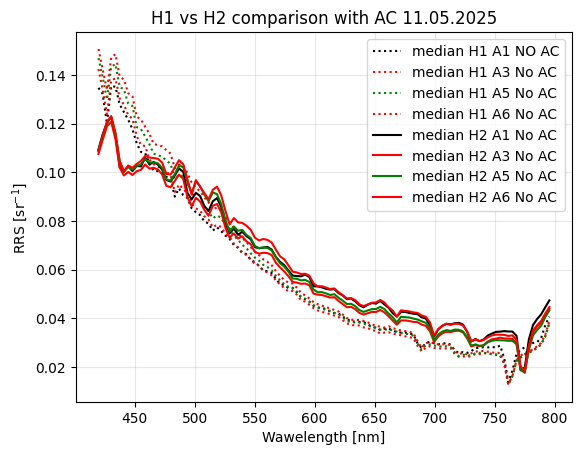

In [53]:
### H1 atmc 
#plt.plot(wl, median_A1_0511_h1_atmc, color='black', linestyle='--', label='median H1 A1')
##plt.plot(wl, median_A2_0511_h1_atmc, color='pink', linestyle='--', label='median H1 A2')
#plt.plot(wl, median_A3_0511_h1_atmc, color='red', linestyle='--', label='median H1 A3')
#plt.plot(wl, median_A5_0511_h1_atmc, color='green', linestyle='--', label='median H1 A5')
#plt.plot(wl, median_A6_0511_h1_atmc, color='blue', linestyle='--', label='median H1 A6')

# H2 atmc 
#plt.plot(wl, median_250511_H2_A1, color='black', label='median H2 A1')
##plt.plot(wl, median_250511_H2_A2, color='pink', label='median H2 A2')
#plt.plot(wl, median_250511_H2_A3, color='red', label='median H2 A3')
#plt.plot(wl, median_250511_H2_A5, color='green', label='median H2 A5')
#plt.plot(wl, median_250511_H2_A6, color='blue', label='median H2 A6')

##### H1 NO atmc 
plt.plot(wl, median_H1_no_atmc_A1, color='black', linestyle=':', label='median H1 A1 NO AC')
#plt.plot(wl, median_H1_no_atmc_A2, color='pink', linestyle=':', label='median H1 A2 No AC')
plt.plot(wl, median_H1_no_atmc_A3, color='red', linestyle=':', label='median H1 A3 No AC')
plt.plot(wl, median_H1_no_atmc_A5, color='green', linestyle=':', label='median H1 A5 No AC')
plt.plot(wl, median_H1_no_atmc_A6, color='red', linestyle=':', label='median H1 A6 No AC')

### H2 No atmc 
plt.plot(wl, median_A1_250511_h2_NO_atmc, color='black', label='median H2 A1 No AC')
#plt.plot(wl, median_A2_250511_h2_NO_atmc, color='pink', linestyle='dashdot', label='median H2 A2 NO AC')
plt.plot(wl, median_A3_250511_h2_NO_atmc, color='red', label='median H2 A3 No AC')
plt.plot(wl, median_A5_250511_h2_NO_atmc, color='green', label='median H2 A5 No AC')
plt.plot(wl, median_A6_250511_h2_NO_atmc, color='red', label='median H2 A6 No AC')

plt.xlabel("Wawelength [nm]")
plt.ylabel("RRS [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("H1 vs H2 comparison with AC 11.05.2025") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Derivates

### Cluster